In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

After importing the required libraries, we next load the MNIST data set to train our digit recognition model
This dataset has thousands of 28x28 black and white digit images.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel vals to doubles in range [0, 1]

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Next, we define our digit recognition model to take in 28x28 pixel images
The ReLU function optimizes the hidden layer while Softmax optimizes the output layer (good for multi-class classification)

In [6]:
digit_recognition_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

Finally, we can train the model and save the final product.

In [4]:
# Train model 
digit_recognition_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

batch_size = 128
epochs = 20
digit_recognition_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)
test_loss, test_accuracy = digit_recognition_model.evaluate(x_test, y_test)

digit_recognition_model.save("trained_digit_model.h5")

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print(digit_recognition_model.input_shape)

Epoch 1/50
469/469 [==============================] - 42s 88ms/step - loss: 0.1582 - accuracy: 0.9535 - val_loss: 0.4076 - val_accuracy: 0.8851 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 43s 91ms/step - loss: 0.0616 - accuracy: 0.9817 - val_loss: 0.0561 - val_accuracy: 0.9819 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 43s 93ms/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0370 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 43s 91ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0327 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 44s 94ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0424 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 44s 93ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0303 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 40s 

Now, let's try running our model on the following example digit image:

In [5]:
ex_img = cv2.imread('images/digit2.jpg')
ex_img = cv2.cvtColor(ex_img, cv2.COLOR_BGR2GRAY)
ex_img = cv2.resize(ex_img, (28, 28))
ex_img = ex_img.astype('float32') / 255.0
ex_img = np.reshape(ex_img, (1, 28, 28, 1))
print (ex_img.shape)

(1, 28, 28, 1)


In [6]:
digit_probabilities = digit_recognition_model.predict(ex_img)

print(digit_probabilities)

digit = np.argmax(digit_probabilities)

print("Classified digit is: " + str(digit))


1/1 [==============================] - 0s 110ms/step
[[2.2001387e-08 9.4310391e-09 9.9999988e-01 3.6452267e-08 2.0942670e-09
  3.5546115e-11 7.8091346e-11 4.2853888e-08 4.8846484e-08 1.2023473e-09]]
Classified digit is: 2


Next, let's try running it on another example digit image. This time, the image has been extracted from the board after our transformations.

(1, 28, 28, 1)


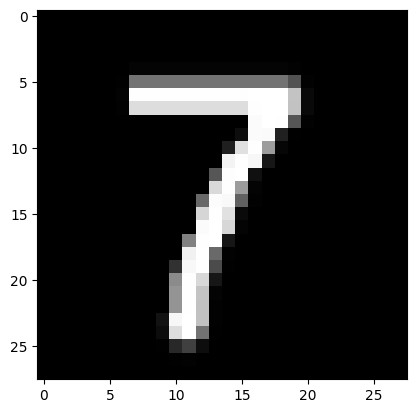

In [5]:
ex_img2 = cv2.imread('../images/num7.jpg')

ex_img2 = cv2.cvtColor(ex_img2, cv2.COLOR_BGR2GRAY)
ex_img2 = cv2.resize(ex_img2, (28, 28))
ex_img2 = ex_img2.astype('float32') / 255.0

plt.imshow(ex_img2, cmap='Greys_r', interpolation='nearest')
ex_img2 = np.reshape(ex_img2, (1, 28, 28, 1))

print (ex_img2.shape)

In [8]:
digit_probabilities2 = digit_recognition_model.predict(ex_img2)

print(digit_probabilities2)

digit2 = np.argmax(digit_probabilities2)

print("Classified digit is: " + str(digit2))


1/1 [==============================] - 0s 16ms/step
[[1.2776567e-07 2.0073880e-04 5.8373407e-06 3.8394443e-05 7.0651424e-08
  1.8988273e-09 8.3512788e-09 9.9975389e-01 4.0830543e-07 5.0954088e-07]]
Classified digit is: 7
